# Lab: Trees and Model Stability

Trees are notorious for being **unstable**: Small changes in the data can lead to noticeable or large changes in the tree. We're going to explore this phenomenon, and a common rebuttal.

In the folder for this lab, there are three datasets that we used in class: Divorce, heart failure, and the AirBnB price dataset.

1. Pick one of the datasets and appropriately clean it.
2. Perform a train-test split for a specific seed (save the seed for reproducibility). Fit a classification/regression tree and a linear model on the training data and evaluate their performance on the test data. Set aside the predictions these models make.
3. Repeat step 2 for three to five different seeds (save the seeds for reproducibility). How different are the trees that you get? Your linear model coefficients?. Set aside the predictions these models make.

Typically, you would see the trees changing what appears to be a non-trivial amount, while the linear model coefficients don't vary nearly as much. Often, the changes appear substantial.

But are they?

4. Instead of focusing on the tree or model coefficients, do three things:
    1. Make scatterplots of the predicted values on the test set from question 2 against the predicted values for the alternative models from part 3, separately for your trees and linear models. Do they appear reasonably similar?
    2. Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models. Are they highly correlated or not?
    3. Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2, separately for your trees and linear models. Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

5. Do linear models appear to have similar coefficients and predictions across train/test splits? Do trees?
6. True or false, and explain: "Even if the models end up having a substantially different appearance, the predictions they generate are often very similar."

In [ ]:
!git clone "https://github.com/ds3001f25/lab_tree_stability"

Cloning into 'lab_tree_stability'...
remote: Enumerating objects: 16, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 16 (delta 0), reused 0 (delta 0), pack-reused 13 (from 1)
Receiving objects: 100% (16/16), 798.84 KiB | 15.07 MiB/s, done.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

#**Q1**

In [ ]:
air=pd.read_csv("/content/lab_tree_stability/data/airbnb_hw.csv")

In [ ]:
#Dropping Rows With NA's
air_clean=air
#Coercing Variables to Numeric
air_clean['Review Scores Rating']=pd.to_numeric(air_clean['Review Scores Rating'],errors='coerce')
air_clean['Number Of Reviews']=pd.to_numeric(air_clean['Number Of Reviews'],errors='coerce')
air_clean['Beds']=pd.to_numeric(air_clean['Beds'],errors='coerce')
air_clean['Price']=pd.to_numeric(air_clean['Price'],errors='coerce')

air_clean=air.dropna()

air_clean.head()

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549.0,96.0
5,1039,7/25/2008,Big Greenpoint 1BD w/ Skyline View,Brooklyn,Apartment,100.0,Entire home/apt,11222.0,1.0,1,4,149.0,100.0
6,1783,8/12/2008,Amazing Also,Manhattan,Apartment,100.0,Entire home/apt,10004.0,1.0,1,9,250.0,100.0
7,2078,8/15/2008,"Colorful, quiet, & near the subway!",Brooklyn,Apartment,90.0,Private room,11201.0,1.0,1,80,90.0,94.0
8,2339,8/20/2008,East Village Cocoon: 2 Bedroom Flat,Manhattan,Apartment,90.0,Entire home/apt,10009.0,2.0,1,95,270.0,90.0


#**Q2&Q3**


In [ ]:
#Vector of Seeds:
seeds = [42, 101, 2025, 7, 99]

# Establishing Price as dependent variable and Beds, Number of Reviews, and Review Scores Rating as dependent
y = air_clean["Price"]

X = air_clean[["Beds", "Number Of Reviews", "Review Scores Rating"]]

for seed in seeds:

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    tree = DecisionTreeRegressor(random_state=seed)
    lm = LinearRegression()

    tree.fit(X_train, y_train)
    lm.fit(X_train, y_train)

    pred_tree = tree.predict(X_test)
    pred_lm   = lm.predict(X_test)

    mse_tree = mean_squared_error(y_test, pred_tree)
    mse_lm   = mean_squared_error(y_test, pred_lm)

    r2_tree = r2_score(y_test, pred_tree)
    r2_lm   = r2_score(y_test, pred_lm)

    mae_tree = mean_absolute_error(y_test, pred_tree)
    mae_lm   = mean_absolute_error(y_test, pred_lm)


    print(f"\nSeed {seed}")
    print(f"MSE (Tree): {mse_tree}")
    print(f"MSE (LM):   {mse_lm}")
    print(f"R^2 (Tree): {r2_tree}")
    print(f"R^2 (LM): {r2_lm}")
    print(f"MAE (Tree): {mae_tree}")
    print(f"MAE (LM): {mae_lm}")
    print(f"Intercept: {lm.intercept_}")
    print(f"Slope: {lm.coef_[0]}")
    print(f"Slope: {lm.coef_[1]}")
    print(f"Slope: {lm.coef_[2]}")



Seed 42
MSE (Tree): 9555.639844281985
MSE (LM):   7759.022350291233
R^2 (Tree): 0.02742374827473326
R^2 (LM): 0.2102840838005814
MAE (Tree): 66.80793150063865
MAE (LM): 61.570584270879245
Intercept: -39.80153415480456
Slope: 44.39815169994367
Slope: -0.18158588127325115
Slope: 1.3582871083451236
R^2 (Tree): 0.02742374827473326

Seed 101
MSE (Tree): 10905.295149171556
MSE (LM):   8186.410768604637
R^2 (Tree): -0.05870630669094412
R^2 (LM): 0.20524803856016716
MAE (Tree): 69.14273635914135
MAE (LM): 62.75123864735247
Intercept: -39.17053610978991
Slope: 44.59718400686625
Slope: -0.1774560495436881
Slope: 1.342368856312322
R^2 (Tree): -0.05870630669094412

Seed 2025
MSE (Tree): 10178.08839773197
MSE (LM):   8027.815818597924
R^2 (Tree): 0.025607700065780947
R^2 (LM): 0.23146256809137145
MAE (Tree): 68.22286675329028
MAE (LM): 61.96913768928665
Intercept: -38.311432887540036
Slope: 43.92795798465883
Slope: -0.1718377936657901
Slope: 1.3442362987614491
R^2 (Tree): 0.025607700065780947

See

The linear regression model is very stable across seeds. The coefficients do not change much, with the only noticable change being the intercept. However, the decision tree is less stable than the linear model, with R^2 values ranging from positive to negative. Its performance changes more across seeds, reflecting the tree's sensitivity to small differences in training data.

# **Q4**

1. The scatterplots of the different seeds appear very similar. Most of the points cluster around in the lower bottom left of the graph with several points scatter above the cluster.

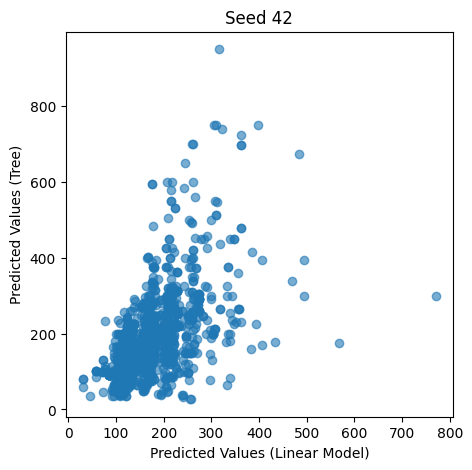

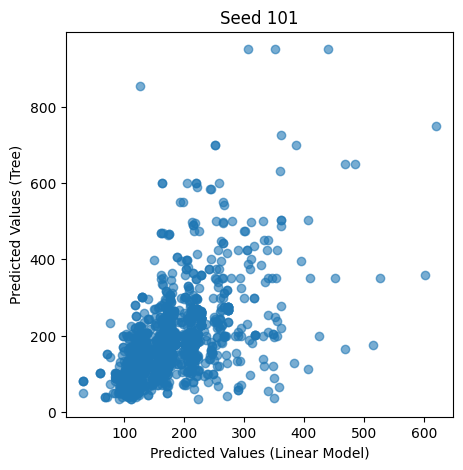

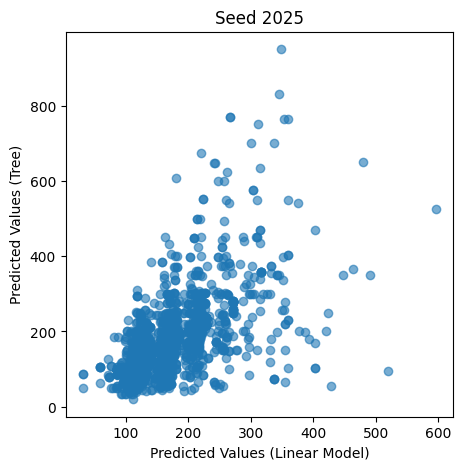

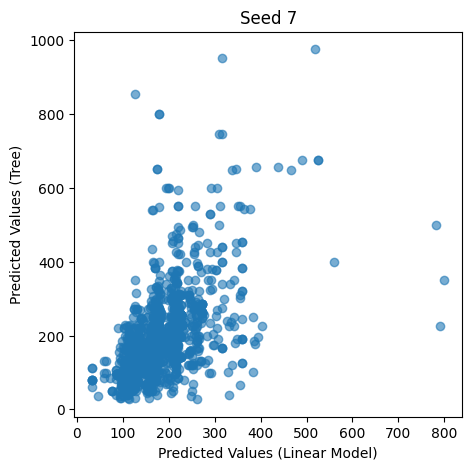

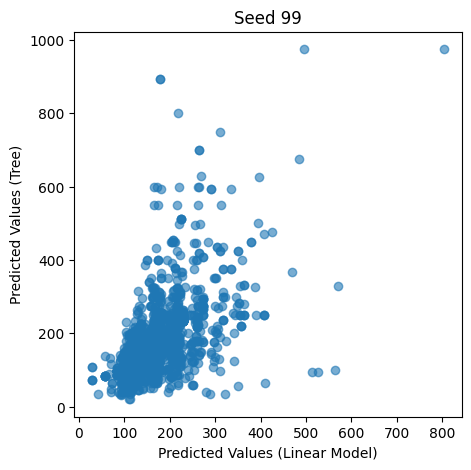

In [ ]:
for seed in seeds:

    # split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    # models
    tree = DecisionTreeRegressor(random_state=seed)
    lm   = LinearRegression()

    tree.fit(X_train, y_train)
    lm.fit(X_train, y_train)

    # predictions for THIS seed
    pred_tree = tree.predict(X_test)
    pred_lm   = lm.predict(X_test)

    plt.figure(figsize=(5,5))
    plt.scatter(pred_lm, pred_tree, alpha=0.6)
    plt.xlabel("Predicted Values (Linear Model)")
    plt.ylabel("Predicted Values (Tree)")
    plt.title(f"Seed {seed}")
    plt.show()




2. The correlation between linear regression and the baseline model is extremely highly correlation while the correlation between linear regression and tree regression is somewhat strong.

In [ ]:
# Compute the correlation between your model in part 2 and your alternative models in part 3, separately for your trees and linear models.
# Are they highly correlated or not?

baseline_model = LinearRegression()
baseline_model.fit(X, y)

for seed in seeds:

    # split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=seed
    )

    # fit models
    tree = DecisionTreeRegressor(random_state=seed)
    lm   = LinearRegression()

    tree.fit(X_train, y_train)
    lm.fit(X_train, y_train)

    # predictions for THIS seed
    pred_tree = tree.predict(X_test)
    pred_lm   = lm.predict(X_test)

    # baseline predictions on THE SAME X_test
    pred_base = baseline_model.predict(X_test)

    # correlations
    corr_tree = np.corrcoef(pred_base, pred_tree)[0, 1]
    corr_lm   = np.corrcoef(pred_base, pred_lm)[0, 1]

    print(f"\nSeed {seed}")
    print(f"Correlation (Baseline vs Tree): {corr_tree}")
    print(f"Correlation (Baseline vs LM):   {corr_lm}")


Seed 42
Correlation (Baseline vs Tree): 0.6663029603408082
Correlation (Baseline vs LM):   0.9999943940812791

Seed 101
Correlation (Baseline vs Tree): 0.6536183542829057
Correlation (Baseline vs LM):   0.9999975009331356

Seed 2025
Correlation (Baseline vs Tree): 0.6621238779554841
Correlation (Baseline vs LM):   0.9999969675778017

Seed 7
Correlation (Baseline vs Tree): 0.652680026644957
Correlation (Baseline vs LM):   0.9999996277396116

Seed 99
Correlation (Baseline vs Tree): 0.635304193641845
Correlation (Baseline vs LM):   0.9999557381176809


3. The intercept of the tree model regression is around 4.78 while the linear model regression has an intercept very close to 0. Both models have slopes close to 1 with the linear model regression being almost exactly 1. The tree model regression shows a much weaker fit with and $R^2$ around 0.4 while the linear model regression fits extremely well, with an $R^2$ of 0.9998.

In [ ]:
#Run a simple linear regression of the predicted values on the test set from the alternative models on the predicted values from question 2,
#separately for your trees and linear models.
#Is the intercept close to zero? Is the slope close to 1? Is the $R^2$ close to 1?

tree_reg = LinearRegression()
tree_reg.fit(pred_lm.reshape(-1, 1), pred_tree)
tree_pred = tree_reg.predict(pred_base.reshape(-1, 1))

print("Tree Model Regression")
print(f"Intercept: {tree_reg.intercept_}")
print(f"Slope: {tree_reg.coef_[0]}")
print(f"R^2: {r2_score(pred_tree, tree_pred)}")

lm_reg = LinearRegression()
lm_reg.fit(pred_lm.reshape(-1, 1), pred_lm)
lm_pred = lm_reg.predict(pred_base.reshape(-1, 1))

print("\nLinear Model Regression")
print(f"Intercept: {lm_reg.intercept_}")
print(f"Slope: {lm_reg.coef_[0]}")
print(f"R^2: {r2_score(pred_lm, lm_pred)}")



Tree Model Regression
Intercept: 4.778839344061794
Slope: 0.9613891427093725
R^2: 0.4035838719550161

Linear Model Regression
Intercept: 1.1368683772161603e-13
Slope: 0.9999999999999993
R^2: 0.999843585218391


# **Q5**

The linear models appear to have similar coefficients and predictions across test/train splits. Looking at our models, the 'Beds' coefficients stayed within 0.8 from one another across five different seeds, and the other coefficients acted similarly. Trees did not follow the same pattern, having slightly more varied predictions. Notably, our R^2 values fluctuated across seeds for the trees. This was expected, as trees are known to be less stable. However, the splits did not lead to either model having extreme differences.

# **Q6**

True. Linear models are stable in both appearance and prediction, while  trees might look different but still yield predictions that are not drastically different in overall performance. Looking at question four, while the correlation between the linear model was stronger, the trees still had a strong positive correlation, meaning the predictions generated were ultimately similar.